# Load data

## Load 2019 regular season and postseason (minus world-series)

In [1]:
import pandas as pd
df = pd.read_csv('./statcast-2019-10-21.csv.gz')

In [2]:
df_postseason = pd.read_csv('./statcast-postseason-2019.csv.gz')

In [3]:
df = pd.concat([df, df_postseason])

In [4]:
df = df[pd.to_datetime(df.game_date).dt.year == 2019]

In [5]:
with pd.option_context('display.max_columns', None):
    display(df.head(10))

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
731207,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,595777,519326,field_out,hit_into_play,NaN,NaN,NaN,NaN,NaN,"Athletics challenged (catch or drop), call on ...",R,L,R,OAK,SEA,X,7.0,fly_ball,0,0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12,Bot,83.41,57.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,38.0,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.003,0.0,1.0,0.0,0.0,3.0,103,1,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731208,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,strikeout,called_strike,NaN,NaN,NaN,NaN,NaN,Nick Hundley called out on strikes.,R,R,R,OAK,SEA,S,2.0,NaN,1,2,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,102,4,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731209,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,OAK,SEA,S,NaN,NaN,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,3,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731210,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,ball,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,OAK,SEA,B,NaN,NaN,0,1,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,2,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731211,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,OAK,SEA,S,NaN,NaN,0,0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,1,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731212,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,640461,519326,field_out,hit_into_play,NaN,NaN,NaN,NaN,NaN,Chad Pinder flies out to left fielder Domingo ...,R,R,R,OAK,SEA,X,7.0,fly_ball,0,1,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,12,Bot,74.28,105.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,38.0,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.003,0.0,1.0,0.0,0.0,3.0,101,2,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731213,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,640461,519326,NaN,foul,NaN,NaN,NaN,NaN,NaN,NaN,R,R,R,OAK,SEA,S,NaN,NaN,0,0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,12,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566084,519326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,1,NaN,4,5,4,5,5,4,4,5,NaN,NaN
731214,NaN,2019-03-21,NaN,NaN,NaN,Fernando Rodney,553882,407845,strikeout,called_strike,NaN,NaN,NaN,NaN,NaN,Omar Narvaez called out on strikes.,R,L,R,OAK,SEA,S,2.0,NaN,2,2,2019,NaN,NaN,NaN,NaN,571745.0,570267.0,NaN,2,12,Top,NaN,Na

## Load player name -> MLB ID mapping

In [6]:
player_ids = pd.read_csv('~/Downloads/playerid_list.csv')

In [7]:
player_ids.head()

,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBCODE,RETROSHEETCODE
0,Ausmus,Brad,3,AUSMUS19690414A,110385.0,ausmb001
1,Bagwell,Jeff,4,BAGWELL19680527A,110432.0,bagwj001
2,Berkman,Lance,6,BERKMAN19760210A,204020.0,berkl001
3,Biggio,Craig,7,BIGGIO19651214A,110987.0,biggc001
4,Blum,Geoff,8,BLUM19730426A,150398.0,blumg001


In [8]:
player_ids['mlbname'] = player_ids.apply(lambda x: str(x['FIRSTNAME']) + ' ' + str(x['LASTNAME']), axis=1)

In [9]:
# backwards compat
player_ids.rename({'MLBCODE': 'MLBID'}, axis=1, inplace=True)

In [10]:
batter_ids = player_ids.copy()
batter_ids.columns = [f'batter_{c.lower()}' for c in batter_ids.columns]

In [11]:
pitcher_ids = player_ids.copy()
pitcher_ids.columns = [f'pitcher_{c.lower()}' for c in pitcher_ids.columns]

### Add image URLs

In [12]:
import numpy as np
img_url = 'http://gdx.mlb.com/images/gameday/mugshots/mlb/{}@2x.jpg'
player_ids['img'] = player_ids.MLBID.apply(lambda x: img_url.format(int(x)) if not np.isnan(x) else '')
player_ids.head()

,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBID,RETROSHEETCODE,mlbname,img
0,Ausmus,Brad,3,AUSMUS19690414A,110385.0,ausmb001,Brad Ausmus,http://gdx.mlb.com/images/gameday/mugshots/mlb...
1,Bagwell,Jeff,4,BAGWELL19680527A,110432.0,bagwj001,Jeff Bagwell,http://gdx.mlb.com/images/gameday/mugshots/mlb...
2,Berkman,Lance,6,BERKMAN19760210A,204020.0,berkl001,Lance Berkman,http://gdx.mlb.com/images/gameday/mugshots/mlb...
3,Biggio,Craig,7,BIGGIO19651214A,110987.0,biggc001,Craig Biggio,http://gdx.mlb.com/images/gameday/mugshots/mlb...
4,Blum,Geoff,8,BLUM19730426A,150398.0,blumg001,Geoff Blum,http://gdx.mlb.com/images/gameday/mugshots/mlb...


## Merge season data with name mappings

In [13]:
df = df.merge(batter_ids, left_on='batter', right_on='batter_mlbid', how='left')
df = df.merge(pitcher_ids, left_on='pitcher', right_on='pitcher_mlbid', how='left')
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_mlbid,batter_retrosheetcode,batter_mlbname,pitcher_lastname,pitcher_firstname,pitcher_playerid,pitcher_davenportcode,pitcher_mlbid,pitcher_retrosheetcode,pitcher_mlbname
0,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,595777,519326,field_out,hit_into_play,...,595777.0,profj001,Jurickson Profar,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
1,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,strikeout,called_strike,...,460026.0,hundn001,Nick Hundley,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
2,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,swinging_strike,...,460026.0,hundn001,Nick Hundley,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
3,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,ball,...,460026.0,hundn001,Nick Hundley,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
4,NaN,2019-03-21,NaN,NaN,NaN,Hunter Strickland,460026,519326,NaN,swinging_strike,...,460026.0,hundn001,Nick Hundley,Strickland,Hunter,57557.0,STRICKLAN19880924A,519326.0,strih001,Hunter Strickland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745788,SI,2019-09-29,95.8,-2.9206,5.8811,Joe Ross,596019,605452,NaN,ball,...,596019.0,NaN,Francisco Lindor,Ross,Joe,70485.0,ROSS19930521A,605452.0,NaN,Joe Ross
745789,FF,2019-09-29,93.3,1.6800,5.8749,Eduardo Rodriguez,593643,593958,NaN,swinging_strike,...,593643.0,NaN,Hanser Alberto,Rodriguez,Eduardo,67588.0,RODRIGUEZ19930407A,593958.0,NaN,Eduardo Rodriguez
745790,FF,2019-09-29,94.2,-3.1781,5.6962,Lance Lynn,518934,458681,NaN,called_strike,...,518934.0,lemad001,DJ LeMahieu,Lynn,Lance,58410.0,LYNN19870512A,458681.0,lynnl001,Lance Lynn
745791,FF,2019-09-29,92.8,-1.9036,6.2428,Jeff Hoffman,663757,656546,NaN,ball,...,663757.0,NaN,Trent Grisham,Hoffman,Jeff,105425.0,HOFFMAN19930108A,656546.0,NaN,Jeff Hoffman


In [14]:
df.batter_mlbname.isnull().sum()

2005

In [15]:
df['batter_mlbname'].fillna('unknown', inplace=True)
df['pitcher_mlbname'] = df.player_name

In [16]:
df.shape

(745793, 103)

# Model Inputs

## Label if batter get on base (walk or hit)

In [17]:
on_base_events = [
    'single',
    'double',
    'triple',
    'home_run',
    'walk',
]

df['is_on_base_event'] = df.events.isin(on_base_events).astype(int)

In [18]:
d = (df
    .sort_values(['game_pk', 'at_bat_number', 'pitch_number'])
    .groupby(['game_pk', 'at_bat_number'])
    .tail(1)
)[['batter_mlbname', 'pitcher_mlbname', 'stand', 'is_on_base_event']]

In [19]:
d.is_on_base_event.mean()

0.3066864012052922

In [20]:
d.head()

,batter_mlbname,pitcher_mlbname,stand,is_on_base_event
3145,Shin-Soo Choo,Matt Harvey,L,0
3113,Rougned Odor,Matt Harvey,L,0
3081,Elvis Andrus,Matt Harvey,R,1
3070,Joey Gallo,Matt Harvey,L,1
3036,Asdrubal Cabrera,Matt Harvey,L,1


## Calculate hits and walks for each batter vs. pitcher in the data set

In [21]:
d = d.groupby(['batter_mlbname', 'pitcher_mlbname', 'stand']).agg({'is_on_base_event': ['sum', 'size']})
d

is_on_base_event     
                                                  sum size
batter_mlbname pitcher_mlbname stand                      
A.J. Pollock   Adam Ottavino   R                    1    2
               Adrian Morejon  R                    1    1
               Alex Claudio    R                    0    2
               Alex Wilson     R                    1    1
               Alex Young      R                    2    5
...                                               ...  ...
unknown        Yusei Kikuchi   L                    4    8
               Yusmeiro Petit  L                    1    2
               Zac Reininger   L                    0    1
               Zach Plesac     L                    1    3
               Zack Greinke    L                    0    3

[83785 rows x 2 columns]

In [22]:
d = pd.concat([d['is_on_base_event']['sum'], d['is_on_base_event']['size']], axis=1).reset_index()

In [23]:
d.rename({'sum': 'on_base', 'size': 'appearances'}, axis=1, inplace=True)
d

,batter_mlbname,pitcher_mlbname,stand,on_base,appearances
0,A.J. Pollock,Adam Ottavino,R,1,2
1,A.J. Pollock,Adrian Morejon,R,1,1
2,A.J. Pollock,Alex Claudio,R,0,2
3,A.J. Pollock,Alex Wilson,R,1,1
4,A.J. Pollock,Alex Young,R,2,5
...,...,...,...,...,...
83780,unknown,Yusei Kikuchi,L,4,8
83781,unknown,Yusmeiro Petit,L,1,2
83782,unknown,Zac Reininger,L,0,1
83783,unknown,Zach Plesac,L,1,3


## Drop players with too few plate appearances or unkown MLB IDs

In [24]:
d = d[~d.batter_mlbname.eq('unknown')]
d = d[~d.pitcher_mlbname.eq('unknown')]
d

,batter_mlbname,pitcher_mlbname,stand,on_base,appearances
0,A.J. Pollock,Adam Ottavino,R,1,2
1,A.J. Pollock,Adrian Morejon,R,1,1
2,A.J. Pollock,Alex Claudio,R,0,2
3,A.J. Pollock,Alex Wilson,R,1,1
4,A.J. Pollock,Alex Young,R,2,5
...,...,...,...,...,...
83549,Zack Wheeler,Spencer Turnbull,L,2,3
83550,Zack Wheeler,Tanner Roark,L,1,2
83551,Zack Wheeler,Walker Buehler,L,0,2
83552,Zack Wheeler,Zac Gallen,L,0,2


In [25]:
plate_appearances = d.groupby('batter_mlbname').appearances.sum()
eligible_batters = plate_appearances[plate_appearances > 2]
eligible_batters.head()

batter_mlbname
A.J. Pollock     355
A.J. Reed         49
Aaron Altherr     66
Aaron Brooks       4
Aaron Hicks      272
Name: appearances, dtype: int64

In [26]:
d = d[d.batter_mlbname.isin(eligible_batters.index)]
d

,batter_mlbname,pitcher_mlbname,stand,on_base,appearances
0,A.J. Pollock,Adam Ottavino,R,1,2
1,A.J. Pollock,Adrian Morejon,R,1,1
2,A.J. Pollock,Alex Claudio,R,0,2
3,A.J. Pollock,Alex Wilson,R,1,1
4,A.J. Pollock,Alex Young,R,2,5
...,...,...,...,...,...
83549,Zack Wheeler,Spencer Turnbull,L,2,3
83550,Zack Wheeler,Tanner Roark,L,1,2
83551,Zack Wheeler,Walker Buehler,L,0,2
83552,Zack Wheeler,Zac Gallen,L,0,2


In [27]:
batters_faced = d.groupby('pitcher_mlbname').appearances.sum()
eligible_pitchers = batters_faced[batters_faced > 2]
eligible_pitchers.head()

pitcher_mlbname
A.J. Cole        118
A.J. Minter      144
A.J. Puk          47
AJ Reed            3
Aaron Altherr      5
Name: appearances, dtype: int64

In [28]:
d = d[d.pitcher_mlbname.isin(eligible_pitchers.index)]
d

,batter_mlbname,pitcher_mlbname,stand,on_base,appearances
0,A.J. Pollock,Adam Ottavino,R,1,2
1,A.J. Pollock,Adrian Morejon,R,1,1
2,A.J. Pollock,Alex Claudio,R,0,2
3,A.J. Pollock,Alex Wilson,R,1,1
4,A.J. Pollock,Alex Young,R,2,5
...,...,...,...,...,...
83549,Zack Wheeler,Spencer Turnbull,L,2,3
83550,Zack Wheeler,Tanner Roark,L,1,2
83551,Zack Wheeler,Walker Buehler,L,0,2
83552,Zack Wheeler,Zac Gallen,L,0,2


## Create name -> index mappings for pymc3 inputs

In [29]:
batter_id_map = {n: i for i, n in enumerate(d.batter_mlbname.unique())}
batter_id_map

{'A.J. Pollock': 0,
 'A.J. Reed': 1,
 'Aaron Altherr': 2,
 'Aaron Brooks': 3,
 'Aaron Hicks': 4,
 'Aaron Judge': 5,
 'Aaron Nola': 6,
 'Aaron Wilkerson': 7,
 'Abiatal Avelino': 8,
 'Abraham Almonte': 9,
 'Abraham Toro-Hernandez': 10,
 'Adam Duvall': 11,
 'Adam Eaton': 12,
 'Adam Engel': 13,
 'Adam Frazier': 14,
 'Adam Haseley': 15,
 'Adam Jones': 16,
 'Adam Wainwright': 17,
 'Adbert Alzolay': 18,
 'Addison Russell': 19,
 'Adeiny Hechavarria': 20,
 'Adrian Houser': 21,
 'Adrian Sanchez': 22,
 'Albert Almora': 23,
 'Albert Pujols': 24,
 'Alec Mills': 25,
 'Aledmys Diaz': 26,
 'Alen Hanson': 27,
 'Alex Avila': 28,
 'Alex Blandino': 29,
 'Alex Bregman': 30,
 'Alex Dickerson': 31,
 'Alex Gordon': 32,
 'Alex Jackson': 33,
 'Alex McRae': 34,
 'Alex Verdugo': 35,
 'Alex Wood': 36,
 'Alex Young': 37,
 'Amed Rosario': 38,
 'Andrelton Simmons': 39,
 'Andrew Benintendi': 40,
 'Andrew Cashner': 41,
 'Andrew Knapp': 42,
 'Andrew Knizner': 43,
 'Andrew McCutchen': 44,
 'Andrew Stevenson': 45,
 'Andre

In [30]:
pitcher_id_map = {n: i for i, n in enumerate(d.pitcher_mlbname.unique())}
pitcher_id_map

{'A.J. Cole': 688,
 'A.J. Minter': 452,
 'A.J. Puk': 652,
 'AJ Reed': 812,
 'Aaron Altherr': 780,
 'Aaron Barrett': 629,
 'Aaron Brooks': 453,
 'Aaron Bummer': 454,
 'Aaron Civale': 301,
 'Aaron Loup': 774,
 'Aaron Nola': 431,
 'Aaron Sanchez': 231,
 'Aaron Slegers': 737,
 'Aaron Wilkerson': 455,
 'Adalberto Mejia': 681,
 'Adam Cimber': 232,
 'Adam Conley': 456,
 'Adam Kolarek': 532,
 'Adam Morgan': 457,
 'Adam Ottavino': 0,
 'Adam Plutko': 233,
 'Adam Wainwright': 432,
 'Adam Warren': 554,
 'Adbert Alzolay': 555,
 'Adonis Rosa': 738,
 'Adrian Houser': 410,
 'Adrian Morejon': 1,
 'Adrian Sampson': 556,
 'Alec Mills': 385,
 'Alex Avila': 764,
 'Alex Claudio': 2,
 'Alex Cobb': 302,
 'Alex Colome': 200,
 'Alex Gordon': 818,
 'Alex McRae': 641,
 'Alex Reyes': 766,
 'Alex Wilson': 3,
 'Alex Wood': 433,
 'Alex Young': 4,
 'Allen Webster': 557,
 'Amir Garrett': 558,
 'Andres Munoz': 5,
 'Andrew Cashner': 234,
 'Andrew Chafin': 6,
 'Andrew Heaney': 533,
 'Andrew Kittredge': 7,
 'Andrew Miller'

In [31]:
d['batter_id'] = d.batter_mlbname.map(batter_id_map)
d['pitcher_id'] = d.pitcher_mlbname.map(pitcher_id_map)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dgates/venvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
d.head()

,batter_mlbname,pitcher_mlbname,stand,on_base,appearances,batter_id,pitcher_id
0,A.J. Pollock,Adam Ottavino,R,1,2,0,0
1,A.J. Pollock,Adrian Morejon,R,1,1,0,1
2,A.J. Pollock,Alex Claudio,R,0,2,0,2
3,A.J. Pollock,Alex Wilson,R,1,1,0,3
4,A.J. Pollock,Alex Young,R,2,5,0,4


## Calculate on base percentages - used as priors in model`

In [33]:
obp = d.groupby('batter_mlbname').apply(lambda x: x.on_base.sum() / x.appearances.sum())
obp

batter_mlbname
A.J. Pollock     0.295775
A.J. Reed        0.204082
Aaron Altherr    0.121212
Aaron Brooks     0.000000
Aaron Hicks      0.327206
                   ...   
Zack Collins     0.287129
Zack Cozart      0.157407
Zack Godley      0.260870
Zack Greinke     0.285714
Zack Wheeler     0.218750
Length: 839, dtype: float64

In [34]:
import numpy as np
batter_name_lookup = {v: k for k, v in batter_id_map.items()}
obps = np.array([obp[batter_name_lookup[i]] for i in range(len(batter_id_map))])

# Model

In [35]:
batter_index = d.batter_id.values
pitcher_index = d.pitcher_id.values
stand_index = np.where(d.stand.eq('R'), 0, 1)
n = d.appearances.values
y_obs = d.on_base.values
y_obs = np.stack([y_obs, n-y_obs], axis=1)
n = np.stack([n, n], axis=1)

In [36]:
n.shape

(83378, 2)

In [37]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as T


def dirichlet(a):
    # reshaping for broadcasting
    sum_ = T.sum(a, axis=1).reshape((1, -1)).T
    return a / sum_


with pm.Model() as model:
    # If pitcher's average score is 7, then a batter's score of 1-3
    # gives an on base-percentage between .200-.300. Seems like a
    # reasonable place to start
    p_mu_prior = 7
    # just some algebra that says if a pitcher's average score is 7
    # what should the batters prior score be to yield their on-base
    # percentage. From the dirichlet equation above.
    b_mu = p_mu_prior / ((1 / obps) - 1)
    
    W_p = pm.Normal('W_p', p_mu_prior, pm.HalfNormal('p_sd', 1), shape=len(pitcher_id_map))

    matchups = T.stack([b_mu[batter_index], W_p[pitcher_index]]).T
    p = dirichlet(matchups)
    
    y_hat = pm.Binomial('y_hat', p=p, n=n, observed=y_obs, total_size=len(y_obs))
    trace = pm.sample(500, cores=1, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [W_p, p_sd]
100%|██████████| 1000/1000 [03:18<00:00,  5.03it/s]
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
There were 76 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134a5fd68>,
      dtype=object)

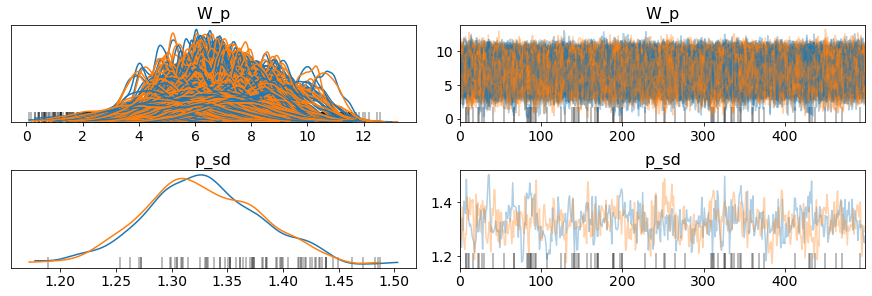

In [38]:
pm.plots.traceplot(trace, compact=True)

# Look at rankings

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss


def sort_key(args):
    val, label, err = args
    return ss.norm.ppf(0.05, val, err)


def display_rankings(means, errors, labels, sort_by, title, limit=30):
    n = len(means)
    center_line = np.mean(means)

    values = means[::-1]
    labels = labels[::-1]
    errors = errors[::-1]

    tmp = sorted(zip(values, labels, errors), key=sort_key, reverse=True)[:limit]
    values, labels, errors = zip(*tmp[::-1])
    labels = [f'{i:2}. {L:3}' for i, L in enumerate(reversed(labels), start=1)]
    # values = values[::-1]
    # errors = errors[::-1]
    labels = labels[::-1]

    fig, ax = plt.subplots(figsize=(10, 10))

    # remove borders
    sns.despine(left=True, bottom=True, top=False)

    # plot error bars
    ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

    # label the y-adxis
    plt.yticks(np.arange(len(labels)))
    locs, _ = plt.yticks()
    plt.yticks(locs, labels)
    plt.tick_params(axis='y', which='both', left=False)

    # give it a reference line
    ax.axvline(center_line, linestyle='--', color='k')

    # Move x axis to top
    ax.xaxis.tick_top()

    # polish it off with a title
    _ = ax.set_title(f'{title} (estimate +/- 1 s.e.)', y=1.05)

In [40]:
pitcher_name_lookup = {v: k for k, v in pitcher_id_map.items()}
zz = pd.DataFrame({
    'means': trace['W_p'].mean(axis=0),
    'stds': trace['W_p'].std(axis=0),
    'quantile': np.quantile(trace['W_p'], 0.05, axis=0),
    'names': [pitcher_name_lookup[i] for i in range(len(pitcher_id_map))]
})
zz.sort_values(['quantile'], ascending=False).head(20)

,means,stds,quantile,names
267,10.653717,0.533332,9.793838,Justin Verlander
251,10.051352,0.485844,9.293423,Gerrit Cole
91,10.151106,0.738419,8.923997,Josh Hader
57,10.029947,0.790356,8.801216,Giovanny Gallegos
224,9.964188,0.731026,8.766059,Seth Lugo
383,9.863132,0.758326,8.664789,Yusmeiro Petit
97,9.768015,0.756839,8.526531,Kirby Yates
381,9.651229,0.752807,8.502917,Yimi Garcia
51,9.688746,0.791033,8.412775,Emilio Pagan
406,9.116823,0.468578,8.403693,Jack Flaherty


/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:247: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.xaxis.majorTicks)
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:248: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.xaxis.minorTicks)
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:251: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:253: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.

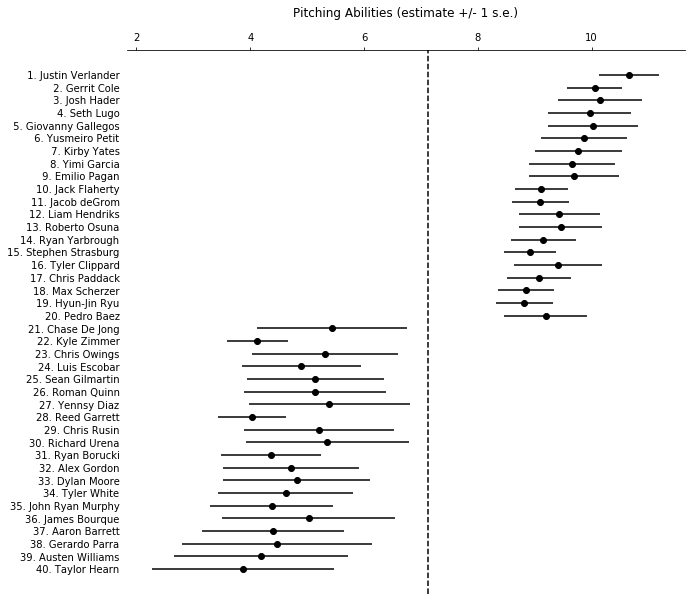

In [41]:
zz.sort_values('quantile', ascending=False, inplace=True)
zz = pd.concat([zz.head(20), zz.tail(20)])

display_rankings(
    zz.means,
    zz.stds,
    zz.names,
    sort_key,
    'Pitching Abilities',
    limit=40
)

# Postseason rankings

In [42]:
postseason_rosters = pd.read_csv('post-season-rosters.csv')
postseason_rosters.head()

,Team,Rk,Uni,Name,Unnamed: 4,Unnamed: 5,OnActv,IL,Age,B,T,Ht,Wt,DoB,1stYr
0,WSN,1,31,Max Scherzer\redirect.fcgi?player=1&mlb_ID=453286,us US,Pitcher,*,NaN,34,R,R,"6' 3""",215,Jul 27 1984,2007
1,WSN,2,19,Anibal Sanchez\redirect.fcgi?player=1&mlb_ID=4...,ve VE,Pitcher,*,NaN,35,R,R,"6' 0""",205,Feb 27 1984,2004
2,WSN,3,29,Roenis Elias\redirect.fcgi?player=1&mlb_ID=606273,cu CU,Pitcher,*,NaN,30,L,L,"6' 1""",205,Aug 1 1988,2008
3,WSN,4,48,Javy Guerra\redirect.fcgi?player=1&mlb_ID=457915,us US,Pitcher,*,NaN,33,R,R,"6' 1""",216,Oct 31 1985,2004
4,WSN,5,63,Sean Doolittle\redirect.fcgi?player=1&mlb_ID=4...,us US,Pitcher,*,NaN,32,L,L,"6' 2""",204,Sep 26 1986,2007


## Clean names to match names loaded above

In [43]:
postseason_rosters['Name'] = postseason_rosters.Name.str.split('\\').apply(lambda x: x[0])
postseason_rosters

,Team,Rk,Uni,Name,Unnamed: 4,Unnamed: 5,OnActv,IL,Age,B,T,Ht,Wt,DoB,1stYr
0,WSN,1,31,Max Scherzer,us US,Pitcher,*,NaN,34,R,R,"6' 3""",215,Jul 27 1984,2007
1,WSN,2,19,Anibal Sanchez,ve VE,Pitcher,*,NaN,35,R,R,"6' 0""",205,Feb 27 1984,2004
2,WSN,3,29,Roenis Elias,cu CU,Pitcher,*,NaN,30,L,L,"6' 1""",205,Aug 1 1988,2008
3,WSN,4,48,Javy Guerra,us US,Pitcher,*,NaN,33,R,R,"6' 1""",216,Oct 31 1985,2004
4,WSN,5,63,Sean Doolittle,us US,Pitcher,*,NaN,32,L,L,"6' 2""",204,Sep 26 1986,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,MIN,36,1,Nick Gordon,us US,Position,NaN,NaN,23,L,R,"6' 0""",160,Oct 24 1995,2014
395,MIN,37,27,Ryan LaMarre,us US,Position,NaN,NaN,30,R,L,"6' 1""",210,Nov 21 1988,2010
396,MIN,38,64,Willians Astudillo,ve VE,Position,NaN,NaN,27,R,R,"5' 9""",225,Oct 14 1991,2009
397,MIN,39,41,Ian Miller,us US,Position,NaN,NaN,27,L,R,"6' 0""",175,Feb 21 1992,2013


In [44]:
postseason_rosters['Name'] = postseason_rosters.Name.map({
    'Gio Urshela': 'Giovanny Urshela',
    'Howard Kendrick': 'Howie Kendrick',
    'Matthew Joyce': 'Matt Joyce',
    'Michael A. Taylor': 'Michael Taylor',
    'Ronald Acuna Jr.': 'Ronald Acuna',
    'Yuli Gurriel': 'Yulieski Gurriel',
    'Ozzie Albies': 'Ozhaino Albies',
    'Tommy Pham': 'Thomas Pham',
}).fillna(postseason_rosters.Name)

In [45]:
postseason_rosters.shape

(399, 15)

In [46]:
player_ids[player_ids.mlbname.eq('Adam Eaton')]

,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBID,RETROSHEETCODE,mlbname,img
376,Eaton,Adam,611,EATON19771123A,284566.0,eatoa001,Adam Eaton,http://gdx.mlb.com/images/gameday/mugshots/mlb...
50614,Eaton,Adam,67746,EATON19881206A,594809.0,eatoa002,Adam Eaton,http://gdx.mlb.com/images/gameday/mugshots/mlb...


In [47]:
# there are some duplicate names, however if we take only the most recent it "works out"
# as no duplicates seem to be active in the post season at this time
keep_ids = player_ids.sort_values(['mlbname', 'MLBID']).groupby('mlbname').tail(1)
postseason_rosters = postseason_rosters.merge(keep_ids, left_on='Name', right_on='mlbname', how='left')
postseason_rosters.shape

(399, 23)

In [49]:
pitchers = postseason_rosters[postseason_rosters.iloc[:, 5].eq('Pitcher')]
position_players = postseason_rosters[postseason_rosters.iloc[:, 5].ne('Pitcher')]

In [50]:
pitchers['player_index'] = pitchers.Name.map(pitcher_id_map)
position_players['player_index'] = position_players.Name.map(batter_id_map)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dgates/venvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
pitchers.head()

,Team,Rk,Uni,Name,Unnamed: 4,Unnamed: 5,OnActv,IL,Age,B,...,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBID,RETROSHEETCODE,mlbname,img,player_index,pitching_ability
0,WSN,1,31,Max Scherzer,us US,Pitcher,*,NaN,34,R,...,Scherzer,Max,56753.0,SCHERZER19840727A,453286.0,schem001,Max Scherzer,http://gdx.mlb.com/images/gameday/mugshots/mlb...,113.0,8.845078
1,WSN,2,19,Anibal Sanchez,ve VE,Pitcher,*,NaN,35,R,...,Sanchez,Anibal,45578.0,SANCHEZ19840227A,434671.0,sanca004,Anibal Sanchez,http://gdx.mlb.com/images/gameday/mugshots/mlb...,8.0,7.907574
2,WSN,3,29,Roenis Elias,cu CU,Pitcher,*,NaN,30,L,...,Elias,Roenis,70509.0,ELIAS19880801A,606273.0,eliar001,Roenis Elias,http://gdx.mlb.com/images/gameday/mugshots/mlb...,617.0,7.540230
3,WSN,4,48,Javy Guerra,us US,Pitcher,*,NaN,33,R,...,Guerra,Javy,47851.0,GUERRA19851031A,457915.0,guerj002,Javy Guerra,http://gdx.mlb.com/images/gameday/mugshots/mlb...,75.0,7.447127
4,WSN,5,63,Sean Doolittle,us US,Pitcher,*,NaN,32,L,...,Doolittle,Sean,53253.0,DOOLITTLE19860926A,448281.0,dools001,Sean Doolittle,http://gdx.mlb.com/images/gameday/mugshots/mlb...,145.0,7.768957


In [56]:
position_players.head()

,Team,Rk,Uni,Name,Unnamed: 4,Unnamed: 5,OnActv,IL,Age,B,...,1stYr,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBID,RETROSHEETCODE,mlbname,img,player_index
11,WSN,12,16,Victor Robles,do DO,Position,*,NaN,22,R,...,2014,Robles,Victor,104023.0,ROBLES19970519A,645302.0,NaN,Victor Robles,http://gdx.mlb.com/images/gameday/mugshots/mlb...,788.0
12,WSN,13,6,Anthony Rendon,us US,Position,*,NaN,29,R,...,2012,Rendon,Anthony,70755.0,RENDON19900606A,543685.0,renda001,Anthony Rendon,http://gdx.mlb.com/images/gameday/mugshots/mlb...,52.0
13,WSN,14,15,Matt Adams,us US,Position,*,NaN,30,L,...,2009,Adams,Matt,59582.0,ADAMS19880831A,571431.0,adamm002,Matt Adams,http://gdx.mlb.com/images/gameday/mugshots/mlb...,532.0
14,WSN,15,22,Juan Soto,do DO,Position,*,NaN,20,L,...,2016,Soto,Juan,107182.0,SOTO19981025A,665742.0,NaN,Juan Soto,http://gdx.mlb.com/images/gameday/mugshots/mlb...,441.0
15,WSN,16,28,Kurt Suzuki,us US,Position,*,NaN,35,R,...,2004,Suzuki,Kurt,49076.0,SUZUKI19831004A,435559.0,suzuk001,Kurt Suzuki,http://gdx.mlb.com/images/gameday/mugshots/mlb...,472.0


## Rank teams overall defense

In [57]:
def pitching_ability(name):
    try:
        idx = pitcher_id_map[name]
        return trace['W_p'][:, idx].mean()
    except KeyError:
        return 0
pitchers['pitching_ability'] = postseason_rosters.Name.apply(pitching_ability)
pitchers.pitching_ability.eq(0).mean()

/Users/dgates/venvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.057692307692307696

In [58]:
W_b, W_p = np.repeat(b_mu.reshape((1, -1)), 1000, axis=0), trace['W_p']

In [59]:
def team_estimate(indices, arr):
    indices = np.array([int(x) for x in indices if not np.isnan(x)])
    W = arr[:, indices].mean(axis=1)
    mean = W.mean()
    std = W.std()
    quantile = np.quantile(W, 0.05)
    return mean, std, quantile

/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:247: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.xaxis.majorTicks)
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:248: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.xaxis.minorTicks)
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:251: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/Users/dgates/venvs/py3/lib/python3.6/site-packages/seaborn/utils.py:253: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.

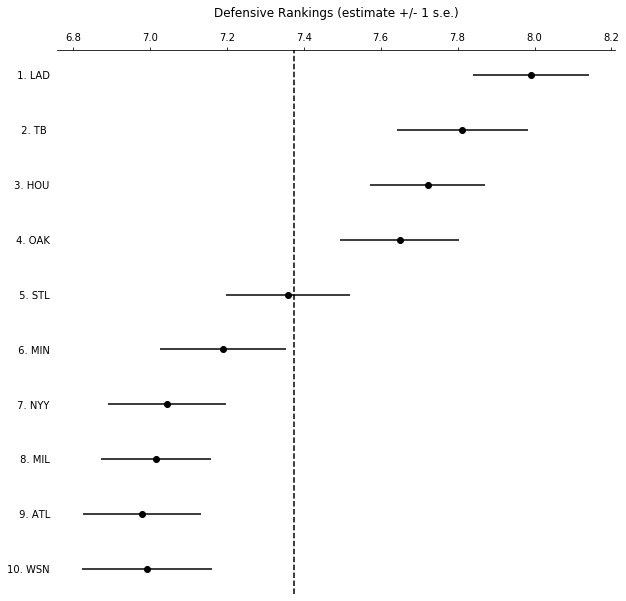

In [60]:
defensive_rankings = pitchers.groupby('Team').player_index.apply(team_estimate, arr=W_p)

means, stds, low = zip(*defensive_rankings)
labels = defensive_rankings.index
team_sort_keys = {x: y for x, y in zip(labels, low)}

display_rankings(means, stds, labels, team_sort_keys.get, title='Defensive Rankings')

# World Series Projections

In [61]:
pitchers.set_index('Name', inplace=True)
position_players.set_index('Team', inplace=True)

In [278]:
import scipy.stats as ss


starters = [
    ('Max Scherzer', 'Gerrit Cole'),
    ('Stephen Strasburg', 'Justin Verlander'),
    ('Patrick Corbin', 'Zack Greinke'),
]


def get_Wb(team):
    indices = position_players.loc[team].player_index.dropna().astype(int)
    return W_b[:, indices], [batter_name_lookup[i] for i in indices]

def get_Wp(pitcher):
    idx = pitchers.loc[pitcher].player_index
    return W_p[:, int(idx)]


outcomes = []
for wash_starter, hou_starter in starters:
    simulation_idx = np.random.randint(len(W_p), size=1000)

    W_b_wash, names_wash = get_Wb('WSN')
    W_b_wash = W_b_wash[simulation_idx, :]
    W_b_hou, names_hou = get_Wb('HOU')
    W_b_hou = W_b_hou[simulation_idx, :]
    W_p_wash = get_Wp(wash_starter)[simulation_idx].reshape((-1, 1))
    W_p_hou = get_Wp(hou_starter)[simulation_idx].reshape((-1, 1))

    matchups = (W_p_wash / (W_b_hou + W_p_wash))
    outcomes.append(
        pd.DataFrame({
            'Pitcher': wash_starter,
            'Probability of Getting an Out': matchups.mean(axis=0),
            'lower_bound': np.quantile(matchups, 0.05, axis=0),
            'upper_bound': np.quantile(matchups, 0.95, axis=0),
            'Batter': names_hou}))

    matchups = (W_p_hou / (W_b_wash + W_p_hou))
    outcomes.append(
        pd.DataFrame({
            'Pitcher': hou_starter,
            'Probability of Getting an Out': matchups.mean(axis=0),
            'lower_bound': np.quantile(matchups, 0.05, axis=0),
            'upper_bound': np.quantile(matchups, 0.95, axis=0),
            'Batter': names_wash}))

In [279]:
sim = pd.concat(outcomes)
sim['Pitching Team'] = sim.Pitcher.apply(lambda x: pitchers.loc[x].Team)
game_numbers = sim[['Pitcher', 'Pitching Team']].drop_duplicates()
game_numbers['Game Number'] = game_numbers.groupby('Pitching Team').cumcount() + 1
sim = sim.merge(game_numbers)
print(sim.shape)
sim

(108, 7)


,Pitcher,Probability of Getting an Out,lower_bound,upper_bound,Batter,Pitching Team,Game Number
0,Max Scherzer,0.741062,0.723937,0.758021,Robinson Chirinos,WSN,1
1,Max Scherzer,0.647471,0.627206,0.667753,Alex Bregman,WSN,1
2,Max Scherzer,0.693625,0.674709,0.712457,George Springer,WSN,1
3,Max Scherzer,0.757731,0.741332,0.773940,Kyle Tucker,WSN,1
4,Max Scherzer,0.674429,0.654905,0.693909,Yordan Alvarez,WSN,1
...,...,...,...,...,...,...,...
103,Zack Greinke,0.595794,0.572759,0.617626,Andrew Stevenson,HOU,3
104,Zack Greinke,0.841797,0.828853,0.853695,Carter Kieboom,HOU,3
105,Zack Greinke,0.926019,0.919323,0.932109,Raudy Read,HOU,3
106,Zack Greinke,0.789764,0.773680,0.804644,Adrian Sanchez,HOU,3


In [280]:
sim = sim.merge(keep_ids, left_on='Batter', right_on='mlbname')
print(sim.shape)
sim.head()

(108, 15)


,Pitcher,Probability of Getting an Out,lower_bound,upper_bound,Batter,Pitching Team,Game Number,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBID,RETROSHEETCODE,mlbname,img
0,Max Scherzer,0.741062,0.723937,0.758021,Robinson Chirinos,WSN,1,Chirinos,Robinson,33829,CHIRINOS19840605A,455139.0,chirr001,Robinson Chirinos,http://gdx.mlb.com/images/gameday/mugshots/mlb...
1,Stephen Strasburg,0.742300,0.725657,0.757867,Robinson Chirinos,WSN,2,Chirinos,Robinson,33829,CHIRINOS19840605A,455139.0,chirr001,Robinson Chirinos,http://gdx.mlb.com/images/gameday/mugshots/mlb...
2,Patrick Corbin,0.706006,0.688661,0.722583,Robinson Chirinos,WSN,3,Chirinos,Robinson,33829,CHIRINOS19840605A,455139.0,chirr001,Robinson Chirinos,http://gdx.mlb.com/images/gameday/mugshots/mlb...
3,Max Scherzer,0.647471,0.627206,0.667753,Alex Bregman,WSN,1,Bregman,Alex,70607,BREGMAN19940330A,608324.0,NaN,Alex Bregman,http://gdx.mlb.com/images/gameday/mugshots/mlb...
4,Stephen Strasburg,0.648938,0.629221,0.667566,Alex Bregman,WSN,2,Bregman,Alex,70607,BREGMAN19940330A,608324.0,NaN,Alex Bregman,http://gdx.mlb.com/images/gameday/mugshots/mlb...


In [281]:
sim['Pitcher'] = sim['Pitcher']# + ' (Game ' + sim['Game Number'].astype(str) + ')'
sim['Pitcher'].drop_duplicates()

0          Max Scherzer
1     Stephen Strasburg
2        Patrick Corbin
48          Gerrit Cole
49     Justin Verlander
50         Zack Greinke
Name: Pitcher, dtype: object

In [282]:
# ys = sim[['Pitching Team', 'Game Number']].drop_duplicates().sort_values(['Game Number', 'Pitching Team'])
# ys['y'] = np.arange(len(ys))
# ys

In [283]:
# sim = sim.merge(ys)

In [284]:
df_pitchers = sim[['Pitcher', 'Game Number', 'Pitching Team']].drop_duplicates().sort_values(['Game Number', 'Pitching Team'], ascending=False)
df_pitchers['img_url'] = df_pitchers.Pitcher.apply(lambda x: keep_ids[keep_ids.mlbname.eq(x)].img.iloc[0])
df_pitchers['pitcher_img'] = df_pitchers.Pitcher.apply(lambda x: f'images/{x}.png')
df_pitchers['label'] = df_pitchers.apply(lambda x: f'Game {x["Game Number"]} starter', axis=1)
df_pitchers

,Pitcher,Game Number,Pitching Team,img_url,pitcher_img,label
2,Patrick Corbin,3,WSN,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Patrick Corbin.png,Game 3 starter
50,Zack Greinke,3,HOU,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Zack Greinke.png,Game 3 starter
1,Stephen Strasburg,2,WSN,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Stephen Strasburg.png,Game 2 starter
49,Justin Verlander,2,HOU,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Justin Verlander.png,Game 2 starter
0,Max Scherzer,1,WSN,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Max Scherzer.png,Game 1 starter
48,Gerrit Cole,1,HOU,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Gerrit Cole.png,Game 1 starter


In [285]:
df_pitchers['y'] = [0, 2, 6, 8, 12, 14]
df_pitchers

,Pitcher,Game Number,Pitching Team,img_url,pitcher_img,label,y
2,Patrick Corbin,3,WSN,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Patrick Corbin.png,Game 3 starter,0
50,Zack Greinke,3,HOU,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Zack Greinke.png,Game 3 starter,2
1,Stephen Strasburg,2,WSN,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Stephen Strasburg.png,Game 2 starter,6
49,Justin Verlander,2,HOU,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Justin Verlander.png,Game 2 starter,8
0,Max Scherzer,1,WSN,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Max Scherzer.png,Game 1 starter,12
48,Gerrit Cole,1,HOU,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Gerrit Cole.png,Game 1 starter,14


In [286]:
sim = sim.merge(df_pitchers)
sim['y_offset'] = np.abs(np.random.uniform(0, 1, size=len(sim)))
sim['y_offset'] = sim.y_offset * np.where(sim['Pitching Team'] == 'HOU', 1, -1)

In [287]:
sim.sort_values(['Pitcher', 'Game Number', 'Probability of Getting an Out'], inplace=True)
sim['y_jitter'] = sim.y + (sim.y_offset * (np.arange(len(sim)) % 2))

In [288]:
sim.head()

,Pitcher,Probability of Getting an Out,lower_bound,upper_bound,Batter,Pitching Team,Game Number,LASTNAME,FIRSTNAME,PLAYERID,...,MLBID,RETROSHEETCODE,mlbname,img,img_url,pitcher_img,label,y,y_offset,y_jitter
63,Gerrit Cole,0.627610,0.609340,0.646826,Andrew Stevenson,HOU,1,Stevenson,Andrew,106961,...,664057.0,NaN,Andrew Stevenson,http://gdx.mlb.com/images/gameday/mugshots/mlb...,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Gerrit Cole.png,Game 1 starter,14,0.335709,14.000000
49,Gerrit Cole,0.693989,0.677335,0.711387,Anthony Rendon,HOU,1,Rendon,Anthony,70755,...,543685.0,renda001,Anthony Rendon,http://gdx.mlb.com/images/gameday/mugshots/mlb...,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Gerrit Cole.png,Game 1 starter,14,0.903094,14.903094
51,Gerrit Cole,0.694732,0.678100,0.712106,Juan Soto,HOU,1,Soto,Juan,107182,...,665742.0,NaN,Juan Soto,http://gdx.mlb.com/images/gameday/mugshots/mlb...,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Gerrit Cole.png,Game 1 starter,14,0.306605,14.000000
61,Gerrit Cole,0.705581,0.689281,0.722588,Howie Kendrick,HOU,1,Kendrick,Howie,45437,...,435062.0,kendh001,Howie Kendrick,http://gdx.mlb.com/images/gameday/mugshots/mlb...,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Gerrit Cole.png,Game 1 starter,14,0.773354,14.773354
54,Gerrit Cole,0.733224,0.717855,0.749214,Trea Turner,HOU,1,Turner,Trea,70917,...,607208.0,NaN,Trea Turner,http://gdx.mlb.com/images/gameday/mugshots/mlb...,http://gdx.mlb.com/images/gameday/mugshots/mlb...,images/Gerrit Cole.png,Game 1 starter,14,0.656101,14.000000


In [289]:
sim['headshot'] = sim.Batter.apply(lambda x: f'images/{x}.png')

# Final plot

## Remove backgrounds from headshots

In [290]:
# from PIL import Image
# import urllib


# for _, rec in sim.iterrows():
#     try:
#         with urllib.request.urlopen(rec.img) as f:
#             img = Image.open(f)
#     except:
#         print(rec)
#     img = img.convert("RGBA")
#     datas = img.getdata()

#     newData = []
#     c = None
#     for item in datas:
#         if c is None:
#             c = np.array(item)
#         if np.max(np.abs(np.array(item) - c)[:-1]) <= 20:
#             newData.append((255, 255, 255, 0))
#         else:
#             newData.append(item)

#     img.putdata(newData)
#     img.save(f"images/{rec.Batter}.png", "PNG")

In [291]:
# from PIL import Image
# import urllib


# for _, rec in df_pitchers.iterrows():
#     try:
#         with urllib.request.urlopen(rec.img) as f:
#             img = Image.open(f)
#     except:
#         print(rec)
#     img = img.convert("RGBA")
#     datas = img.getdata()

#     newData = []
#     c = None
#     for item in datas:
#         if c is None:
#             c = np.array(item)
#         if np.max(np.abs(np.array(item) - c)[:-1]) <= 20:
#             newData.append((255, 255, 255, 0))
#         else:
#             newData.append(item)

#     img.putdata(newData)
#     img.save(f"images/{rec.Pitcher}.png", "PNG")

## Plot

In [295]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure
from bokeh.transform import jitter, factor_cmap
from bokeh.io import output_notebook
from bokeh.models import HoverTool, LinearColorMapper, CategoricalColorMapper
from bokeh.palettes import Spectral4



output_notebook()


hover = HoverTool(
        tooltips=[
            ("Batter", "@Batter"),
            ('Probability of Getting Out', '$x'),
            ('Probability Bounds', '(@lower_bound, @upper_bound)'),
        ]
    )

sim['bounds'] = bounds = sim['upper_bound'] - sim['lower_bound']
sim['color'] = np.where(sim['Pitching Team'] == 'WSN', 'red', 'orange')

source = ColumnDataSource(sim)

p = figure(
    title='2019 Pitching Matchups',
    x_range=(0.52, .9),
    y_range=(df_pitchers.y.min() - 2, df_pitchers.y.max() + 2),
    tools=[hover],
    plot_height=800,
    plot_width=1450)

p.circle(
    x='Probability of Getting an Out',
    y='y_jitter',
    source=source,
    size=15,
    color='color',
    alpha=0)


p.image_url(
    url='headshot',
    x='Probability of Getting an Out',
    y='y_jitter',
    source=source,
    w=.012,
    h=1,
    anchor='center')


p_source = ColumnDataSource(df_pitchers)
p.image_url(
    url='pitcher_img',
    x=0.55,
    y='y',
    source=p_source,
    w=.015,
    h=1.2,
    anchor='bottom_right')


labels = LabelSet(
    x=0.55, y='y',
    text='label',
    x_offset=-70,
    y_offset=-25,
    source=p_source,)
p.add_layout(labels)

p.yaxis.axis_line_width = 0
p.yaxis.major_label_text_alpha = 0
p.yaxis.major_tick_line_alpha = 0
p.yaxis.minor_tick_line_alpha = 0



output_file('world-series-2019-matchups.html', title='World Series 2019 Pitching Matchups', mode='inline')
show(p)

Loading BokehJS ...